In [4]:
import pandas as pd

In [5]:
c={"Name":["Alice","Bob"],"Age":[25,30]}
c

{'Name': ['Alice', 'Bob'], 'Age': [25, 30]}

In [7]:
df=pd.DataFrame(c)

In [11]:
df1=pd.read_csv("automobile_prices.csv")

df1.head()
df1.info()

<class 'pandas.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          206 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               206 non-null    str    
 3   fuel-type          206 non-null    str    
 4   aspiration         206 non-null    str    
 5   num-of-doors       204 non-null    str    
 6   body-style         206 non-null    str    
 7   drive-wheels       206 non-null    str    
 8   engine-location    206 non-null    str    
 9   wheel-base         206 non-null    float64
 10  length             206 non-null    float64
 11  width              206 non-null    float64
 12  height             206 non-null    float64
 13  curb-weight        206 non-null    int64  
 14  engine-type        206 non-null    str    
 15  num-of-cylinders   206 non-null    str    
 16  engine-size        206 non-null    in

In [14]:
df2=pd.read_csv("houses_to_rent_to_fix.csv")
df2.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2.0,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,NaN,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1.0,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,NaN,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1.0,1,0,1,not acept,not furnished,0,800,25,11,836


In [16]:
df2.isnull().sum()

city                   0
area                   0
rooms                  4
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [20]:
df2[df2["rooms"].isnull()]
df2[df2["bathroom"]>8]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
421,São Paulo,900,4.0,9,8,1,acept,not furnished,0,15000,5700,226,20930
1020,São Paulo,845,5.0,9,6,-,acept,furnished,0,8499,1000,128,9627
1130,São Paulo,360,4.0,9,8,-,acept,not furnished,0,8540,1329,129,9998
2055,São Paulo,998,7.0,10,4,-,acept,furnished,0,15000,5000,226,20230
5178,São Paulo,400,10.0,9,8,-,acept,not furnished,0,8330,550,126,9006
8187,São Paulo,700,4.0,10,0,-,acept,not furnished,0,15000,8750,226,23980
9021,Belo Horizonte,458,8.0,10,4,-,acept,not furnished,0,7000,419,115,7534


In [22]:
pivot=df2.pivot_table(
    index="rooms",
    aggfunc="count",
    values="city")

<Axes: xlabel='rooms'>

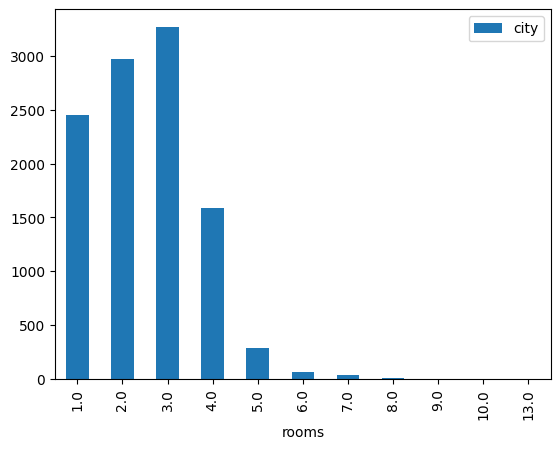

In [23]:
pivot.plot(kind="bar")

In [42]:
avg_price=df2["total (R$)"].mean()
avg_price

threshold=avg_price*2.5
print(f"The threshold is {threshold}")

The threshold is 13726.217499064722


In [43]:
gt=df2[df2["total (R$)"]>threshold]
gt

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
8,São Paulo,152,2.0,2,1,3,acept,furnished,1000,15000,250,191,16440
19,São Paulo,600,4.0,5,6,-,acept,not furnished,0,12000,9500,181,21680
40,São Paulo,300,4.0,6,4,20,acept,not furnished,3700,12000,1584,153,17440
63,São Paulo,278,4.0,5,2,16,acept,furnished,4052,9000,1261,115,14430
86,São Paulo,600,4.0,4,4,9,acept,not furnished,7400,8500,3368,108,19380
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10633,Rio de Janeiro,290,4.0,4,0,-,acept,not furnished,0,15000,750,229,15980
10669,São Paulo,340,4.0,5,3,15,not acept,furnished,3519,12000,1287,153,16960
10681,São Paulo,230,3.0,5,3,3,not acept,not furnished,3800,11000,1100,140,16040
10688,São Paulo,285,4.0,4,4,17,acept,not furnished,3100,15000,973,191,19260


In [44]:
top_10=gt.sort_values(
    by="total (R$)",
    ascending=False)

top_10

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
6979,Belo Horizonte,155,1.0,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
255,Belo Horizonte,155,1.0,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
6645,São Paulo,42,1.0,2,1,6,not acept,not furnished,690,2500,313700,32,316900
6230,São Paulo,340,5.0,4,2,7,acept,not furnished,220000,12000,1000,153,233200
2859,São Paulo,285,4.0,5,4,6,acept,furnished,200000,20000,1834,254,222100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,São Paulo,250,4.0,5,4,9,acept,not furnished,4000,8440,1200,107,13750
2219,São Paulo,400,4.0,4,6,8,acept,not furnished,3900,8000,1750,102,13750
9479,São Paulo,250,4.0,2,8,-,acept,not furnished,0,13040,500,197,13740
1894,São Paulo,318,4.0,6,4,13,acept,furnished,3450,10160,0,129,13740
